### Cleaning

- 1 - Cleaning the dataset.
  - read csv file.
  - create the feature - target.
  - Save feather format. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import feather
import time
import lux


In [3]:
# Get start time 
start_time = time.time()

In [4]:
df_covid = pd.read_csv('../dataset/datacovid.csv')
df_covid

/home/andsilva/.local/lib/python3.10/site-packages/lux/executor/PandasExecutor.py:548: UserWarning:Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [18]:
df_covid.head(10000)

/home/andsilva/.local/lib/python3.10/site-packages/lux/executor/PandasExecutor.py:548: UserWarning:Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
df_covid.nunique()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
df_covid.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
df_covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [7]:
plt.style.use('ggplot')
from IPython.core.pylabtools import figsize
import seaborn as sns
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution - Age')

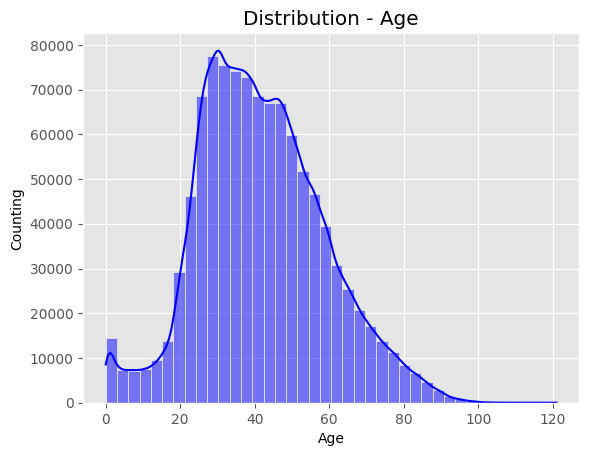

In [8]:
sns.histplot(data=df_covid, x="AGE", bins=40, kde=True, color="blue")
plt.xlabel('Age')
plt.ylabel('Counting')
plt.title('Distribution - Age')

Text(0.5, 1.0, 'Box plot - Age')

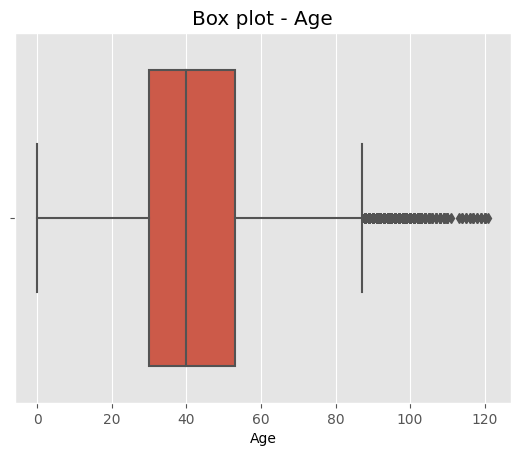

In [9]:
# looking for outliers
sns.boxplot(x=df_covid['AGE'])
plt.xlabel('Age')
plt.title('Box plot - Age')

In [10]:
outliers_age = pd.DataFrame(np.where(df_covid['AGE']>100))
print(outliers_age[0])

0    2360
Name: 0, dtype: int64


In [11]:
df_covid['USMER']

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
# list columns
col_names = list(df_covid.columns)
col_names

['USMER',
 'MEDICAL_UNIT',
 'SEX',
 'PATIENT_TYPE',
 'DATE_DIED',
 'INTUBED',
 'PNEUMONIA',
 'AGE',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'CLASIFFICATION_FINAL',
 'ICU']

In [13]:
print(f"Shape dataset Full after clean:.........observations/rows: {df_covid.shape[0]} and columns: {df_covid.shape[1]}")


Shape dataset Full after clean:.........observations/rows: 1048575 and columns: 21


In [14]:
print("saving the file format feather...")
# this is important to do before save in feather format.
concat_dfs = df_covid.reset_index(drop=True) 
concat_dfs.to_feather('../dataset/feather/cleaned.ftr')

saving the file format feather...


In [15]:
# time of execution in minutes
time_exec_min = round( (time.time() - start_time)/60, 4)

print(f'time of execution (preprocessing): {time_exec_min} minutes')
print("the preprocessing is done.")
print("The next step is to do the feature engineering.")
print("All Done. :)")

time of execution (preprocessing): 0.3205 minutes
the preprocessing is done.
The next step is to do the feature engineering.
All Done. :)
